<a href="https://colab.research.google.com/github/dav1n9/DAP/blob/main/%5Bproject%5Ddivorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [122]:
path_divorce = '/content/drive/MyDrive/DAP_Project/divorce_data/divorce_data.csv'
df = pd.read_csv(path_divorce)
df.head()

,Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce
0,2;2;4;1;0;0;0;0;0;0;1;0;1;1;0;1;0;0;0;1;0;0;0;...
1,4;4;4;4;4;0;0;4;4;4;4;3;4;0;4;4;4;4;3;2;1;1;0;...
2,2;2;2;2;1;3;2;1;1;2;3;4;2;3;3;3;3;3;3;2;1;0;1;...
3,3;2;3;2;3;3;3;3;3;3;4;3;3;4;3;3;3;3;3;4;1;1;1;...
4,2;2;1;1;1;1;0;0;0;0;0;1;0;1;1;1;1;1;2;1;1;0;0;...


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                  --------------  ----- 
 0   Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce  170 non-null    object
dtypes: object(1)
memory usage: 1.5+ KB


데이터가 하나의 문자열로 되있으므로, ';'을 기준으로 행과 열을 나누어야 함.

In [124]:
name = pd.DataFrame(df.columns.str.split(';').tolist())
name

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce


In [125]:
data = df['Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce'].str.split(';')
data

0      [2, 2, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...
1      [4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 3, 4, 0, 4, ...
2      [2, 2, 2, 2, 1, 3, 2, 1, 1, 2, 3, 4, 2, 3, 3, ...
3      [3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, ...
4      [2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, ...
                             ...                        
165    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
166    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
167    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, ...
168    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
169    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...
Name: Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce, Length: 170, dtype: object

In [126]:
#데이터프레임 전체에 적용하려면 apply(lambda x: )를 이용
data = data.apply(lambda x: pd.Series(x))
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


In [127]:
data.columns =name.iloc[0]
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


# 데이터 분석
이혼한 경우와 이혼하지 않은 경우의 대답을 분석하여, 이혼의 원인을 찾아보기

각 질문에 대해서 어떤 대답을 하였는지, 살펴보자.

(0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).

In [128]:
#'divorce'의 값이 1인 행들의 데이터들만 따로 저장
data_marriage = data.groupby('Divorce').get_group('1')
#'divorce'의 값이 0인 행들의 데이터들만 따로 저장
data_divorce = data.groupby('Divorce').get_group('0')

!!! 대답이 없는경우 NaN값이 들어감 ... 이부분 해결해야함.
 Q3에선 '0'으로 대답한 사람 없음.

In [129]:
d = data_marriage.iloc[:, 31].value_counts().sort_index()
d

1     5
2     3
3    28
4    48
Name: Q32, dtype: int64

In [130]:
# 이혼하지 않은 경우

res_m = pd.DataFrame([1, 1, 1, 1, 1])

for i in range(len(data_marriage.columns)-1):
  res_count = data_marriage.iloc[:, i].value_counts()

  index_check = res_count.index
  if('0' not in index_check):   #'0'을 대답한 사람이 없는 경우 '0'행을 추가하여 0값을 넣어준다.
    res_count['0'] = '0'
  if('1' not in index_check):
    res_count['1'] = '0'
  if('2' not in index_check):
    res_count['2'] = '0'
  if('3' not in index_check):
    res_count['3'] = '0'
  if('4' not in index_check):
    res_count['4'] = '0'

  res_count = res_count.sort_index().tolist()     # 행(인덱스) 기준으로 정렬

  res_df = pd.DataFrame(res_count)
  res_m.insert(i, "Q"+str(i+1), res_df, True)

# 해당 대답이 없는 경우 nan값이 들어가 있어서, 0으로 채워줌
res_m = res_m.fillna(0)
res_m = res_m.astype(int)
res_m

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,0
0,1,2,0,2,3,22,29,4,3,2,2,2,2,3,1,2,1,1,2,1,5,7,9,4,5,3,4,6,3,2,2,0,3,2,6,5,1,3,1,1,1,1,2,2,4,4,3,0,0,0,0,0,0,4,1
1,1,2,4,3,5,35,41,3,2,1,2,1,2,2,4,2,2,2,1,4,4,7,4,3,1,3,5,3,5,4,6,5,6,6,7,6,3,3,1,1,2,4,3,2,2,3,6,2,2,4,5,5,6,3,1
2,8,23,15,29,6,22,5,19,13,29,4,18,9,19,11,25,5,16,4,21,17,26,6,21,11,21,17,30,10,22,2,3,4,5,1,2,3,3,5,3,7,6,4,5,7,11,7,5,9,5,5,6,8,7,1
3,45,35,49,32,44,4,4,37,49,34,44,42,44,38,51,35,50,44,50,36,47,29,43,35,43,37,46,28,43,35,17,28,16,25,14,24,16,23,13,23,14,28,19,28,24,23,13,30,17,20,29,16,23,14,1
4,29,22,16,18,26,1,5,21,17,18,32,21,27,22,17,20,26,21,27,22,11,15,22,21,24,20,12,17,23,21,57,48,55,46,56,47,61,52,64,56,60,45,56,47,47,43,55,47,56,55,45,57,47,56,1


In [131]:
# 이혼한 경우

res_d = pd.DataFrame([0, 0, 0, 0, 0])

for i in range(len(data_divorce.columns)-1):
  res_count = data_divorce.iloc[:, i].value_counts()

  index_check = res_count.index
  if('0' not in index_check):   #'0'을 대답한 사람이 없는 경우 '0'행을 추가하여 0값을 넣어준다.
    res_count['0'] = '0'
  if('1' not in index_check):
    res_count['1'] = '0'
  if('2' not in index_check):
    res_count['2'] = '0'
  if('3' not in index_check):
    res_count['3'] = '0'
  if('4' not in index_check):
    res_count['4'] = '0'

  res_count = res_count.sort_index().tolist()     # 행(인덱스) 기준으로 정렬

  res_df = pd.DataFrame(res_count)
  res_d.insert(i, "Q"+str(i+1), res_df, True)

# 해당 대답이 없는 경우 nan값이 들어가 있어서, 0으로 채워줌
res_d = res_d.fillna(0)
res_d = res_d.astype(int)
res_d

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,0
0,68,57,51,73,79,64,85,77,81,60,69,56,45,63,68,73,72,78,75,80,73,80,81,68,58,69,73,79,78,70,42,46,68,48,79,83,48,61,49,71,54,43,14,58,24,18,30,10,28,19,12,23,31,46,0
1,8,21,20,9,5,14,1,7,5,17,17,26,31,21,16,12,13,8,10,6,13,6,3,13,27,17,13,7,8,15,22,25,14,31,6,3,28,21,27,12,24,13,16,14,22,15,28,8,26,27,24,23,25,24,0
2,6,5,11,1,2,7,0,2,0,9,0,4,9,2,2,1,1,0,1,0,0,0,2,5,1,0,0,0,0,1,19,9,2,5,0,0,7,3,9,3,7,20,29,12,14,17,13,42,17,31,38,17,18,14,0
3,2,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,1,0,0,1,0,0,1,6,14,0,12,25,7,20,10,6,9,14,7,1,0
4,2,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,1,0,0,3,0,1,0,0,4,13,2,14,11,8,6,5,3,3,9,5,1,0


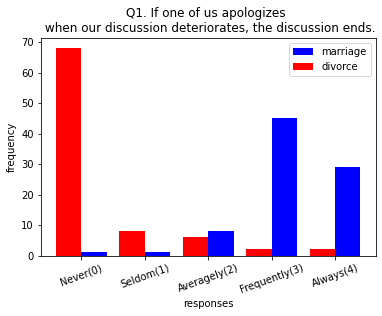

In [132]:
# "Q1.토론이 악화되었을 때 우리 중 하나가 사과하면 토론이 끝납니다." 에 대한 대답
answers = [0, 1, 2, 3, 4]
answers_mean = ['Never(0)', 'Seldom(1)', 'Averagely(2)', 'Frequently(3)', 'Always(4)']
plt.bar(res_m.Q1.index +0.2, res_m.Q1, color = 'blue', width = 0.4, label = "marriage")
plt.bar(res_d.Q1.index -0.2, res_d.Q1, color = 'red', width = 0.4, label = "divorce")
plt.xlabel("responses")
plt.ylabel("frequency")
plt.title("Q1. If one of us apologizes \n when our discussion deteriorates, the discussion ends.")
plt.legend()
plt.xticks(answers, answers_mean, fontsize=10, rotation=20)
plt.show()

모든 질문들에 대한 결과를 한번에 출력해보자.

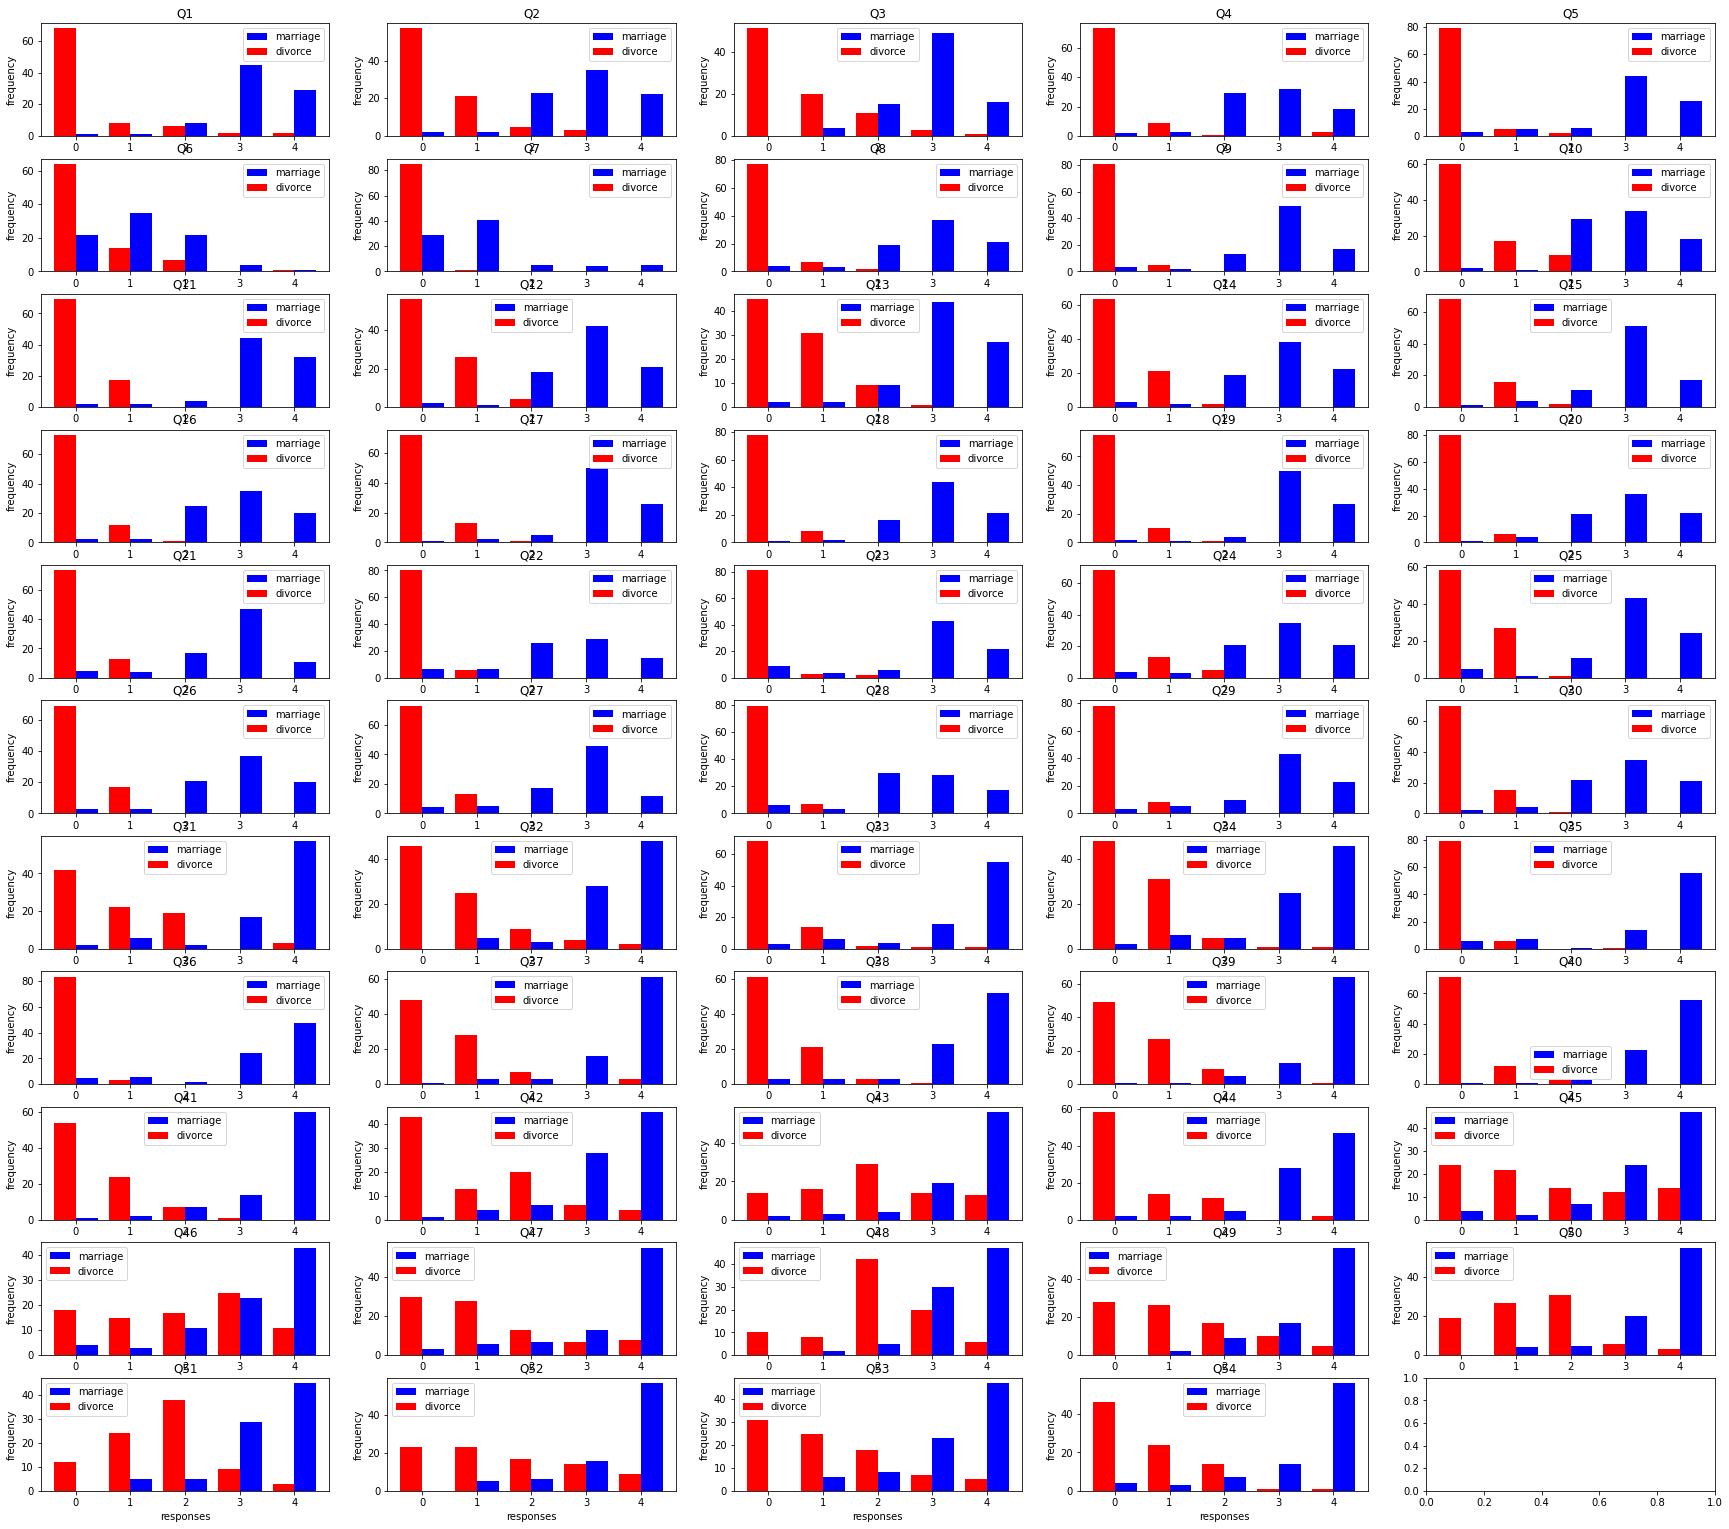

In [133]:
fig,ax=plt.subplots(11, 5, figsize=(30,27))
num_Q = 1
for i in range(0,11):
    for j in range(0,5):
      if num_Q ==55:
            break
      ax[i, j].bar(res_m['Q'+str(num_Q)].index +0.2, res_m['Q'+str(num_Q)], color = 'blue', width = 0.4, label = "marriage")
      ax[i, j].bar(res_d['Q'+str(num_Q)].index -0.2, res_d['Q'+str(num_Q)], color = 'red', width = 0.4, label = "divorce")
      ax[i, j].set_xlabel("responses")
      ax[i, j].set_ylabel("frequency")
      ax[i, j].set_title("Q" + str(num_Q))
      num_Q += 1
      ax[i, j].legend()
      #ax.xticks(answers, answers_mean, fontsize=10, rotation=20)
plt.show()

이혼한 사람들은 대부분 0, 1을 대답하였고, 결혼 생활 중인 사람들은 대부분 3, 4를 대답하였다.

=> 2를 기준으로 왼쪽에는 빨간색 막대가, 오른쪽에는 파란색 막대가 있다.

??
왼쪽에도 높은 비율의 파란색 막대가 위치한 6번 질문과 7번 질문
빨간색 막대가 오른쪽으로 치우쳐있거나 전체적으로 비슷한 비율로 위치한 43, 45, 46, 48~52 질문

# 질문 분석

In [134]:
data_reference = pd.read_csv('/content/drive/MyDrive/DAP_Project/divorce_data/reference.tsv', sep = "|", engine='python')

data_reference.head()

,atribute_id,description
0,1,If one of us apologizes when our discussion de...
1,2,"I know we can ignore our differences, even if ..."
2,3,"When we need it, we can take our discussions w..."
3,4,"When I discuss with my spouse, to contact him ..."
4,5,The time I spent with my wife is special for us.


In [135]:
#import re

#words = []
# 공백을 기준으로 단어들을 나누어 리스트에 저장.
#for i in range(0, 54):
#  string = re.sub("\,|\'|\?|\.|\(|\)|","",data_reference.description[i])
#  words += string.split(' ')

In [136]:
#from nltk.tokenize import TreebankWordTokenizer

#tokenizer = TreebankWordTokenizer()
#words = []
# description의 문장들을 단어로 나누어 리스트 words에 저장
# 위의 방법으로 실행했을 때의 문제점 해결
# ex. spouse와 spouse's 가 따로 저장됨 -> spouse's를 spouse와 's으로 분리.
#for i in range(0, 54):
 # words += (tokenizer.tokenize(data_reference.description[i]))

#print(words)

- 위의 방법들 불필요한 단어가 너무 많음.

> 'i', 'me', 'my'와 같은 불용어를 삭제하기위해
NLTK를 통해서 의미없는 단어를 제거한다.

In [137]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english'))
words_len_before = 0
result = []
for i in range(0, 54):
  st = data_reference.description[i]
  word_tokens = word_tokenize(st)
  words_len_before += len(word_tokens)
  for w in word_tokens: 
      if w not in stop_words: 
          result.append(w) 

print(words_len_before)
print(result) 
print(len(result))

680
['If', 'one', 'us', 'apologizes', 'discussion', 'deteriorates', ',', 'discussion', 'ends', '.', 'I', 'know', 'ignore', 'differences', ',', 'even', 'things', 'get', 'hard', 'sometimes', '.', 'When', 'need', ',', 'take', 'discussions', 'spouse', 'beginning', 'correct', '.', 'When', 'I', 'discuss', 'spouse', ',', 'contact', 'eventually', 'work', '.', 'The', 'time', 'I', 'spent', 'wife', 'special', 'us', '.', 'We', "n't", 'time', 'home', 'partners', '.', 'We', 'like', 'two', 'strangers', 'share', 'environment', 'home', 'rather', 'family', '.', 'I', 'enjoy', 'holidays', 'wife', '.', 'I', 'enjoy', 'traveling', 'wife', '.', 'Most', 'goals', 'common', 'spouse', '.', 'I', 'think', 'one', 'day', 'future', ',', 'I', 'look', 'back', ',', 'I', 'see', 'spouse', 'I', 'harmony', '.', 'My', 'spouse', 'I', 'similar', 'values', 'terms', 'personal', 'freedom', '.', 'My', 'spouse', 'I', 'similar', 'sense', 'entertainment', '.', 'Most', 'goals', 'people', '(', 'children', ',', 'friends', ',', 'etc', '.'

단어수 680 -> 436 으로 줄어듦

In [139]:
# 단어들이 빈도수 세기
import collections

counts = collections.Counter(result)
print(counts.most_common(10))

[('I', 54), ('.', 52), ('spouse', 35), (',', 14), ("'s", 12), ('know', 10), ('When', 7), ('discussions', 7), ('My', 6), ('similar', 6)]


여전히 불필요한 단어들 많아보임
* 단어의 길이가 3이하인 단어 지우기

* stop_words에 불용어 추가하기.
  - ex. stop_words.update((values))
  
* 명사나 동사만 가져오기

In [140]:
len_result = len(result)-1
index = 0

for i in range(0, len(result)-1):
  if len(result[len_result-i]) <= 3:
    result.remove(result[len_result-i])

print(result)
print(len(result))

['If', 'apologizes', 'discussion', 'deteriorates', 'discussion', 'ends', 'know', 'ignore', 'differences', 'even', 'things', 'hard', 'sometimes', 'When', 'need', 'take', 'discussions', 'spouse', 'beginning', 'correct', 'When', 'discuss', 'spouse', 'contact', 'eventually', 'work', 'time', 'spent', 'wife', 'special', 'time', 'home', 'partners', 'like', 'strangers', 'share', 'environment', 'home', 'rather', 'family', 'enjoy', 'holidays', 'wife', 'enjoy', 'traveling', 'wife', 'Most', 'goals', 'common', 'spouse', 'think', 'future', 'look', 'back', 'spouse', 'harmony', 'spouse', 'similar', 'values', 'terms', 'personal', 'freedom', 'spouse', 'similar', 'sense', 'entertainment', 'Most', 'goals', 'people', 'children', 'friends', 'dreams', 'spouse', 'similar', 'harmonious', 'compatible', 'spouse', 'love', 'share', 'views', 'happy', 'life', 'spouse', 'spouse', 'similar', 'ideas', 'marriage', 'spouse', 'similar', 'ideas', 'roles', 'marriage', 'spouse', 'similar', 'values', 'trust', 'know', 'exactly

위에서 단어길이가 3이하인 단어 삭제함

단어수 436 -> 252(3이하)



> 3이하인 단어 삭제하면서 'use', 'see', 'say' 와 같은 의미있는 단어들 삭제됨.(무조건 단어 길이로 단어의 의미를 판단하는 건 좋은 방법 아님)
그렇지만 사용빈도가 높지않고, 크게 중요한 단어 아니므로 삭제.



품사 태깅

> VBP = 동사, RB = 부사, VBG = 현재부사, IN = 전치사, NPP = 고유명사, NNS = 복수형 명사, CC = 접속사, DT = 관사


동사와 명사만 가져오자.

In [141]:
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk.tag import pos_tag

tag = pos_tag(result)
print(tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('If', 'IN'), ('apologizes', 'JJ'), ('discussion', 'NN'), ('deteriorates', 'VBZ'), ('discussion', 'NN'), ('ends', 'NNS'), ('know', 'VBP'), ('ignore', 'NN'), ('differences', 'NNS'), ('even', 'RB'), ('things', 'NNS'), ('hard', 'RB'), ('sometimes', 'RB'), ('When', 'WRB'), ('need', 'JJ'), ('take', 'VBP'), ('discussions', 'NNS'), ('spouse', 'VBP'), ('beginning', 'VBG'), ('correct', 'NN'), ('When', 'WRB'), ('discuss', 'NN'), ('spouse', 'NN'), ('contact', 'NN'), ('eventually', 'RB'), ('work', 'JJ'), ('time', 'NN'), ('spent', 'VBN'), ('wife', 'NN'), ('special', 'JJ'), ('time', 'NN'), ('home', 'NN'), ('partners', 'NNS'), ('like', 'IN'), ('strangers', 'NNS'), ('share', 'NN'), ('environment', 'NN'), ('home', 'NN'), ('rather', 'RB'), ('family', 'NN'), ('enjoy', 'VB'), ('holidays', 'NNS'), ('wife', 'NN'), ('enjoy

In [142]:

noun = []
verb = []
adj = []
for i in range(0, len(tag)):
  if tag[i][1][0] == 'N': # or tag[i][1] == 'NNS':
    noun += tag[i]
    noun.remove(tag[i][1])  # 'NN'이나 'NNS'도 저장되어서 지워줌.
  if tag[i][1][0] == 'V':
    verb += tag[i]
    verb.remove(tag[i][1])
  if tag[i][1] == 'JJ':
    adj += tag[i]
    adj.remove(tag[i][1])

# 명사, 동사, 형용사만 뽑았는데,, 잘못 분류된것도 있는듯.
print(noun)
print(len(noun))
print(verb)
print(len(verb))
print(adj)
print(len(adj))

['discussion', 'discussion', 'ends', 'ignore', 'differences', 'things', 'discussions', 'correct', 'discuss', 'spouse', 'contact', 'time', 'wife', 'time', 'home', 'partners', 'strangers', 'share', 'environment', 'home', 'family', 'holidays', 'wife', 'wife', 'goals', 'spouse', 'harmony', 'spouse', 'values', 'terms', 'freedom', 'spouse', 'sense', 'entertainment', 'goals', 'people', 'children', 'friends', 'dreams', 'spouse', 'love', 'share', 'views', 'life', 'spouse', 'spouse', 'ideas', 'marriage', 'ideas', 'roles', 'marriage', 'spouse', 'values', 'trust', 'wife', 'likes', 'spouse', 'care', 'sick', 'food', 'tell', 'kind', 'stress', 'spouse', 'life', 'knowledge', 'spouse', 'world', 'anxieties', 'sources', 'stress', 'spouse', 'wishes', 'spouse', 'relationships', 'argue', 'spouse', 'expressions', 'statements', 'personality', 'discussions', 'expressions', 'discussions', 'discussions', 'discussions', 'discussion', 'hate', 'spouse', 'discussions', 'discussion', 'talk', 'something', 'breaks', 'ar

In [143]:
# 각각 빈도수가 높은 10개만 출력
counts_noun = collections.Counter(noun)
counts_noun = counts_noun.most_common(10)
print(counts_noun)
counts_verb = collections.Counter(verb)
print(counts_verb.most_common(10))
counts_adj = collections.Counter(adj)
print(counts_adj.most_common(10))

[('spouse', 20), ('discussions', 7), ('discussion', 5), ('discuss', 4), ('wife', 4), ('home', 4), ('tell', 3), ('her/his', 3), ('time', 2), ('share', 2)]
[('know', 10), ('spouse', 7), ('enjoy', 2), ('think', 2), ('feel', 2), ('accused', 2), ('deteriorates', 1), ('take', 1), ('beginning', 1), ('spent', 1)]
[('similar', 6), ('silent', 4), ('calm', 2), ('stay', 2), ('right', 2), ('afraid', 2), ('apologizes', 1), ('need', 1), ('work', 1), ('special', 1)]


30개의 단어들 중에서 빈도수가 가장많고, 중요하다고 생각되는 단어를 골라보았다.(비슷한 단어 묶어서)
* discussion / tell / share
* know + spouse/wife (know about your spouse well)
* similar
* silent/calm
* spent(spend)/enjoy + time

질문의 유형을 위의 다섯가지로 분류해보자.


# Classification

classification -> 이혼 예측
* 어떤 알고리즘 사용?
